# Single and Average Trials

In [1]:
%matplotlib inline
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
import tdt
import os


Defining data directory, obtaining the correct data. 

In [2]:
data_directory = r'/Users/vanessagutierrez/data/Rat/RVG14/RVG14_B01'

In [3]:
directory = '/Users/vanessagutierrez/data/Rat/RVG14/RVG14_B01'

In [26]:
def fig_folder(directory):
    savepic = '{}/Figures'.format(directory)
    if not os.path.exists(savepic):
        os.mkdir(savepic)
    if os.path.exists(savepic):
        print("Path exists")
    return savepic

In [28]:
savepic = fig_folder(directory)

Path exists


In [29]:
savepic

'/Users/vanessagutierrez/Desktop/Rat/RVG06/RVG06_B3/Figures'

# Functions

In [17]:
def get_data(data_directory, stream, epoc_event):
    """ Reads data block, extracts stream data, extracts sample rate, extracts data trials
    Args:
        data_directory (path): Data path
        stream (str): Name of stream in data block
        epoc_event (str): Name of epoc in data block
    Returns:
        stream_data (np.array): array of channels by samples
        fs (np.float): sample rate
        trial_list (list): list of np.arrays (trials), within an array (trial) is channels by samples
        animal_block (str): name of animal block
    """
    tdt_data = tdt.read_block(data_directory)
    animal_block = tdt_data.info.blockname
    stream_data = tdt_data.streams[stream].data
    fs = tdt_data.streams[stream].fs
    tdt_trials = tdt.epoc_filter(tdt_data, epoc_event)
    trial_list = tdt_trials.streams[stream].filtered
    
    return stream_data, fs, trial_list, animal_block

In [20]:
def plot_trials(trial_list, stream, fs, trials = True, mean = False): 
    """ Plots data trials and mean of trials per channel
    Args:
        trial_list (list): list of np.arrays (trials), within an array (trial) is channels by samples
        stream (str): Name of stream in data block
        trials(plot, optional): Whether to plot all trials. Defaults to True.
        mean(plot, optional): Whether to plot mean of all trials. Defaults to False.
    """
    stim_delay = 0.25
    
    if stream == "Wave":
        height = 8 
        width = 16
        tmax = 6000
        first, last = 2000, 5000
        chs = [
           81, 83, 85, 87, 89, 91, 93, 95, 97, 105, 98, 106, 114, 122, 113, 121,
           82, 84, 86, 88, 90, 92, 94, 96, 99, 107, 100, 108, 116, 124, 115, 123,
           66, 68, 70, 72, 74, 76, 78, 80, 101, 109, 102, 110, 118, 126, 117, 125,
           65, 67, 69, 71, 73, 75, 77, 79, 103, 111, 104, 112, 120, 128, 119, 127,
           63, 61, 59, 57, 55, 53, 51, 49, 25, 17, 26, 18, 10, 2, 9, 1,
           64, 62, 60, 58, 56, 54, 52, 50, 27, 19, 28, 20, 12, 4, 11, 3,
           48, 46, 44, 42, 40, 38, 36, 34, 29, 21, 30, 22, 14, 6, 13, 5,
           47, 45, 43, 41, 39, 37, 35, 33, 31, 23, 32, 24, 16, 8, 15, 7
           ]
    if stream == "Poly":
        height = 32 
        width = 2
        tmax = 12000
        first, last = 5500, 7000
        chs = [ 
            27, 37,
            26, 38, 
            25, 39, 
            24, 40, 
            23, 41,
            22, 42, 
            21, 43, 
            20, 44, 
            19, 45, 
            18, 46,
            17, 47, 
            16, 48, 
            15, 49, 
            14, 50, 
            13, 51,
            12, 52, 
            11, 53, 
            10, 54, 
            9, 55, 
            8, 56, 
            7, 57, 
            6, 58, 
            5, 59, 
            4, 60, 
            3, 61, 
            2, 62, 
            1, 63, 
            28, 64, 
            29, 36, 
            30, 35, 
            31, 34, 
            32, 33,
            ]
          
    if trials:
        for i in np.arange(len(chs)): 
            plt.subplot(height, width, i + 1)

            for tidx, trial in enumerate(trial_list):
                sub_trial = trial[chs[i] - 1,:tmax]
                plt.plot(sub_trial, color=(.85,.85,.85), linewidth=0.5)
                ymin, ymax = np.min(sub_trial), np.max(sub_trial)
                plt.plot([stim_delay*fs, stim_delay*fs], [ymin, ymax], 'darksalmon')
                plt.xlim(first, last)
                #     plt.plot([.3*fs, .3*fs], [ymin, ymax], 'darksalmon')
                plt.title('Ch. ' + str(chs[i]), fontsize= 9)
                plt.xticks([first, first + 1000, last - 1000, last],[-100, 0, 100, 200])
                plt.xticks(fontsize=10)
                plt.yticks(fontsize=10)
                plt.xlabel('time (ms)', fontsize= 8)
                plt.ylabel('Volts', fontsize= 8)
                
                
            plt.suptitle('{} Average Trial Across Channels'.format(animal_block), fontsize=35, y=1)
            
    if mean:
        trial_mat = np.zeros((tmax, len(trial_list)))
    
        for i in np.arange(len(chs)):

            plt.subplot(height, width, i + 1)

            for tidx, trial in enumerate(trial_list):
                sub_trial = trial[chs[i] - 1, :tmax]
                trial_mat[:, tidx] = sub_trial 

            mean_trial = np.mean(trial_mat, axis=1)
            plt.plot(mean_trial, color='k', linewidth=2.5, zorder=10)
            plt.xlim(first, last)

# Plotting

In [19]:
wave_stream_data, wave_fs, wave_trial_list, animal_block = get_data(data_directory, 'Wave', 'mark')

read from t=0s to t=80.38s


In [64]:
poly_stream_data, poly_fs, poly_trial_list, animal_block = get_data(data_directory, 'Poly', 'mark')

read from t=0s to t=80.38s


In [65]:
# plot_trials(trial_list, 'Wave', mean = True)

In [21]:
f = plt.figure()
f.set_size_inches(70, 35)

plot_trials(wave_trial_list, 'Wave', wave_fs, mean = True)

plt.tight_layout()

stream = 'Wave'
# SAVING FIGURE

f.savefig("{}/{}_{}_Average_Trial_Across_Channels.png".format(savepic, animal_block, stream), dpi=300)

<IPython.core.display.Javascript object>

<ipython-input-20-4247fd94c92c>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-20-4247fd94c92c>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-20-4247fd94c92c>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance

<ipython-input-20-4247fd94c92c>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-20-4247fd94c92c>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-20-4247fd94c92c>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance

<ipython-input-20-4247fd94c92c>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-20-4247fd94c92c>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-20-4247fd94c92c>:92: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance

FileNotFoundError: [Errno 2] No such file or directory: 'None/RVG06_B3_Wave_Average_Trial_Across_Channels.png'

<IPython.core.display.Javascript object>


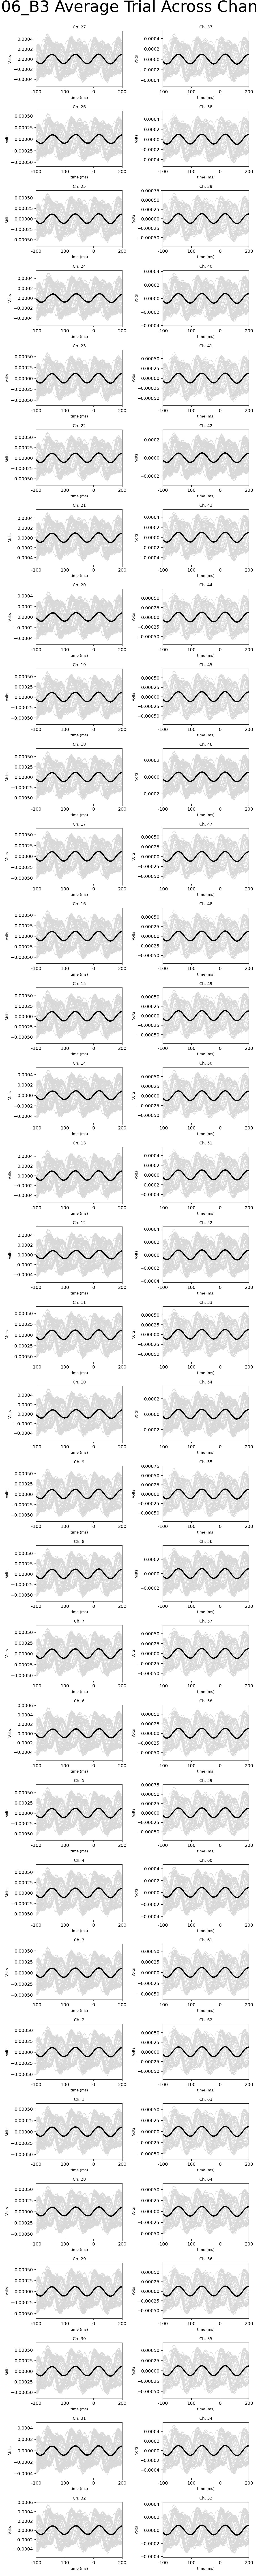

<ipython-input-66-31967412aa89>:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-66-31967412aa89>:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-66-31967412aa89>:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance

<ipython-input-66-31967412aa89>:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-66-31967412aa89>:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(height, width, i + 1)
<ipython-input-66-31967412aa89>:91: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance

In [69]:
f = plt.figure()
f.set_size_inches(8, 80)

plot_trials(poly_trial_list, 'Poly', mean = True)

plt.tight_layout()

# SAVING FIGURE

f.savefig("{}/{}_Poly_Average_Trial_Across_Channels.png".format(savepic, animal_block), dpi=300)

## Average Trial
This function plots the average trial (to use this one right now you have do call plot_trials2 first as I have done below)

In [33]:
# def average_trial(trial_list, chs, tmax, height, width, first, last):
    
#     trial_mat = np.zeros((tmax, len(trial_list)))
    
#     for i in np.arange(len(chs)):
        
#         plt.subplot(height, width, i + 1)
    
#         for tidx, trial in enumerate(trial_list):
#             sub_trial = trial[chs[i] - 1, :tmax]
#             trial_mat[:, tidx] = sub_trial 
            
#         mean_trial = np.mean(trial_mat, axis=1)
# #         std_trial = np.std(trial_mat, axis=1)
#         plt.plot(mean_trial, color='k', linewidth=2.5, zorder=10)
#         plt.xlim(first, last)

#         plt.xticks([2000, 3000, 4000, 5000],[-100, 0, 100, 200])
#         plt.xticks(fontsize=10)
#         plt.yticks(fontsize=10)
        
#         plt.xlabel('time (ms)')
#         plt.ylabel('Volts')
    
#     plt.suptitle('{} Average Trial Across Channels'.format(animal_block), fontsize=60, y=1)
#     plt.supxlabel("Sample Rate", fontsize=20)
#     plt.supylabel("Amplitude", fontsize=20)
#     plt.supxlabel('Sample rate', fontsize= 10)
#     plt.supylabel('Volts', fontsize=10)

In [53]:
#for trial list, index is the channel id  
# for tidx, trial in enumerate(trial_list):
#     print(tidx, trial)